In [21]:
# É necessário rodar o notebook inteiro 4 vezes, para diferentes "signal_name",
#    Também é importante visualizar o gráfico gerado para cada sinal no final

import numpy  # importa a biblioteca numpy, que é muito usada em python para fazer cálculos
from random import randrange, choice # importa algumas funções da biblioteca random que serão usadas  pelo algorítmo
import matplotlib.pyplot as plt
import pandas as pd

#Hiperparâmetros do problema
d_andar =  3 # distância entre andares em metros
v_max_init = 4.0 # velocidade máxima em m/s que o elevador pode chegar
acel_init = 1.5 # aceleração do elevador
num_andares = 5
num_signals = 400 # numero de sinais a serem gerados
lenght_signal = 850 # comprimento do sinal a ser gerado, se diminuir a aceleração ou a velocidade, 
                        # pode precisar de uma valor maior, pois vai precisar de mais tempo para completar o percurso

# _____________________  Aqui Precisa Mudar _______________________
signal_name = 'ruido_desl' # 'correto', 'falha_acel', 'falha_vel', 'ruido_desl'


#Hiperparâmetros de ruído - não deve mudar
if signal_name == 'correto':
    noise_rate = 0.05 # 0.05 - normal, 0.15 - erro
    ruido_acel = 0.2 # 0.2 - normal, 0.6 - erro ruido que provoca variação na aceleração
    ruido_vel = 0.3 # 0.3 - normal, 1.5 - erro ruido que provoca variação na velocidade máxima
    label = 0 # 0-'correto', 1-'falha_acel', 2-'falha_vel', 3-'ruido_desl'
elif signal_name == 'falha_acel':
    noise_rate = 0.05 # 0.05 - normal, 0.15 - erro
    ruido_acel = 0.6 # 0.2 - normal, 0.6 - erro ruido que provoca variação na aceleração
    ruido_vel = 0.3 # 0.3 - normal, 1.5 - erro ruido que provoca variação na velocidade máxima    
    label = 1 # 0-'correto', 1-'falha_acel', 2-'falha_vel', 3-'ruido_desl'
elif signal_name == 'falha_vel':
    noise_rate = 0.05 # 0.05 - normal, 0.15 - erro
    ruido_acel = 0.2 # 0.2 - normal, 0.6 - erro ruido que provoca variação na aceleração
    ruido_vel = 1.5 # 0.3 - normal, 1.5 - erro ruido que provoca variação na velocidade máxima 
    label = 2 # 0-'correto', 1-'falha_acel', 2-'falha_vel', 3-'ruido_desl'
elif signal_name == 'ruido_desl':
    noise_rate = 0.15 # 0.05 - normal, 0.15 - erro
    ruido_acel = 0.2 # 0.2 - normal, 0.6 - erro ruido que provoca variação na aceleração
    ruido_vel = 0.3 # 0.3 - normal, 1.5 - erro ruido que provoca variação na velocidade máxima
    label = 3 # 0-'correto', 1-'falha_acel', 2-'falha_vel', 3-'ruido_desl'

min_not_noise = -0.2 # colocar o valor que seria o ruído normal para aceleração, mas com sinal negativo 
max_not_noise = 0.2 # colocar o valor que seria o ruído normal para aceleração

min_not_noise_vel = -0.3 # colocar o valor que seria o ruído normal para velocidade, mas com sinal negativo 
max_not_noise_vel = 0.3 # colocar o valor que seria o ruído normal para velocidade

#Parâmetros - Não precisa mudar
resolution = 100 # resolução do sinal

numpy.random.seed(seed=3)  #definir para o usuário

def ruido(signal,grau): # Adicionando Ruído browniano https://cadernodelaboratorio.com.br/2018/06/25/geradores-de-ruido-em-python/
    limitesuperior = grau
    numeropontos =  len(signal)
 
    temporario = numpy.random.uniform(low=-1.0, high=1.0, size=numeropontos)
    saida = numpy.cumsum(temporario)
    # normalizamos o sinal para ficar no limite especificado
    max_value = max(saida)
    min_value = min(saida)
 
    for i in range(0, len(saida)):
        saida[i] = ((saida[i] - min_value) / (max_value - min_value)) * limitesuperior

    signal = signal + saida    
    return signal


def generate_signal(d_andar, v_max_init, acel_init, num_andares, noise_rate):
    if label == 0 or label == 3 :
        const_ruido_vel = numpy.random.uniform(-ruido_vel, ruido_vel, 1) #  (-0.1, 0.1, 1) ruido que provoca variação na velocidade maxima
        const_ruido_acel = numpy.random.uniform(-ruido_acel, ruido_acel, 1) # (-0.1, 0.1, 1) ruido que provoca variação na aceleração
    
    if label == 1:
        const_ruido_vel = numpy.random.uniform(-ruido_vel, ruido_vel, 1) #  (-0.1, 0.1, 1) ruido que provoca variação na velocidade maxima
        const_ruido_acel = 0
        while (const_ruido_acel > min_not_noise) and (const_ruido_acel < max_not_noise):
            const_ruido_acel = numpy.random.uniform(-ruido_acel, ruido_acel, 1) # (-0.1, 0.1, 1) ruido que provoca variação na aceleração
        print(const_ruido_acel[0])
    if label == 2:
        const_ruido_acel = numpy.random.uniform(-ruido_acel, ruido_acel, 1) #  (-0.1, 0.1, 1) ruido que provoca variação na velocidade maxima
        const_ruido_vel = 0
        while (const_ruido_vel > min_not_noise_vel) and (const_ruido_vel < max_not_noise_vel):
            const_ruido_vel = numpy.random.uniform(-ruido_vel, ruido_vel, 1) # (-0.1, 0.1, 1) ruido que provoca variação na aceleração
        print('sinal ' + str(const_ruido_vel[0]))   
#   if label == 3:
#        const_ruido_acel = 0
#        const_ruido_vel = 0
#        while const_ruido_vel > min_not_noise and const_ruido_vel < max_not_noise
#            const_ruido_vel = numpy.random.uniform(-ruido_vel, ruido_vel, 1) # (-0.1, 0.1, 1) ruido que provoca variação na aceleração
#        while const_ruido_acel > min_not_noise and const_ruido_acel < max_not_noise
#            const_ruido_acel = numpy.random.uniform(-ruido_acel, ruido_acel, 1) # (-0.1, 0.1, 1) ruido que provoca variação na aceleração
   

    
    acel = acel_init + const_ruido_acel[0]
    v_max = v_max_init + const_ruido_vel[0]
    d_max = (v_max*v_max)/(2*acel) # deslocamento max durante o tempo de acleração, é dado em função da velocidade máxima e usado no cálculo da função custo
                              # fórmula derivada da Eq de Torricelle  
    
    d = num_andares*d_andar/2 # calcula a ditância de deslocamente entre os andares da vez
    if d < d_max: # vê se durante essa distância ele terá atigindo a velocidade max
                    # se não houver atingido a velocidade máxima então não terá deslocamento com velocidade constante
        s = d     # deslocamento com acelaração é feito durante todo o percurso
        s_const = 0 # não há deslocamento com velocidade constante
    if d >= d_max: # se a distância de deslocamento é maior do que a distância que demora para alcansar a velocidade máxima
        s = d_max # tem o deslocamento máximo com aceleração
        s_const = d - d_max # o resto do deslocamento é feito com velocodade constante
    if s == 0:
        a = 0
        b = 0
    else:
        a = 2*((2*s/acel)**(1/2)) # calcula o tempo com velocidade variante, a multiplicação por 2 é pq é aceleração e desaceleração
        b = s_const/(acel*((2*s/acel)**(1/2))) # calcula o tempo com velocidade constante
    
        
    tempo_acel = []
    vel_acel = []
    # Gera curva da velocidade
    # Para aceleração:
    interval = resolution*a/2 # dividi-se por 2 pq 'a' é o tempo da aceleração e da desaceleração
    vel = 0
    step = 1/resolution
    for t in range(0, int(interval)): #varia o tempo de 0 até a, que é o tempo máximo com aceleração
        # a função append é usada para se criar um vetor com todas as posições e se possa gerar um gráfico
        temp = t/resolution
        vel = vel+acel*step
        vel_acel.append(vel) # como sempre inicia do 0, não tem velocidade inicial
        tempo_acel.append(temp)
        
    vel_acel = ruido(vel_acel, noise_rate)    
    vel_acel[0] = 0 # garante que inicia no 0
    final_velocity =  vel_acel[-1] # garante continuidade 
    final_temp = temp
    
        
    #Para sem aceleração
    vel_const = []
    tempo_const = []    
    interval_const = b*resolution
    if b < 0.01: # é necessário para evitar erros, quando a  b*resolution é menor do que '1'
        b = 0
    for t in range(int(interval_const)): #varia o tempo de 0 até a, que é o tempo máximo com aceleração
        # a função append é usada para se criar um vetor com todas as posições e se possa gerar um gráfico
        temp = t/resolution
        vel_const.append(final_velocity) # como sempre inicia do 0, não tem velocidade inicial
        tempo_const.append(final_temp+temp) 
    if b == 0:
        final_temp_const = final_temp
    
    else:
        final_temp_const = final_temp+temp
        vel_const = ruido(vel_const, noise_rate)    
        vel_const[0] = final_velocity # garante continuidade 
        final_velocity = vel_const[-1]  
        
    #Para desaceleração    
    tempo_decel = []
    vel_decel = []    
    interval = resolution*a/2
    vel_d =  final_velocity
    for t in range(0, int(interval)): #varia o tempo de 0 até a, que é o tempo máximo com aceleração
        # a função append é usada para se criar um vetor com todas as posições e se possa gerar um gráfico
        temp = t/resolution
        vel_d = vel_d - acel*step
        vel_decel.append(vel_d) # como sempre inicia do 0, não tem velocidade inicial
        tempo_decel.append(final_temp_const+temp)
    
    vel_decel = ruido(vel_decel, noise_rate)
    vel_decel[0] = final_velocity # garante que para no 0
    vel_decel[-1] = 0 # garante que para no 0
    
        
    x1 = tempo_acel
    y1 = vel_acel  
    
    x2 = tempo_const
    y2 = vel_const 
    
    x3 = tempo_decel
    y3 = vel_decel  
       
   #plt.plot(x1, y1, label = "Aceleração")
   #plt.plot(x2, y2, label = "Velocidade Constante") 
   #plt.plot(x3, y3, label = "Desaceleração") 
   #plt.xlabel('tempo') 
   #plt.ylabel('velocidade') 
   #plt.title('Velocidade x Tempo') 
   #plt.legend()
    y1 = numpy.concatenate((y1, y2), axis=0)
    y1 = numpy.concatenate((y1, y3), axis=0)
    return y1

generate_signal(d_andar, v_max_init, acel_init, num_andares, noise_rate)

signal_created = []
register = []
register_size = (num_signals, lenght_signal)
register = numpy.random.uniform(low=0.0, high=0.0, size=register_size)
for c in range(num_signals):
    signal_created = generate_signal(d_andar, v_max_init, acel_init, num_andares, noise_rate) 
    for d in range(len(signal_created)):
        register[c,d] = signal_created[d]
        
register_label = []
register_label_size = (num_signals, 1)
register_label = numpy.random.uniform(low=label, high=label, size=register_label_size)

register_with_label = numpy.concatenate((register, register_label), axis=1)

file_to_save = pd.DataFrame(register_with_label) 
file_to_save.to_csv('Sinal do elevador %s' %signal_name +'.csv', index = True) 
    

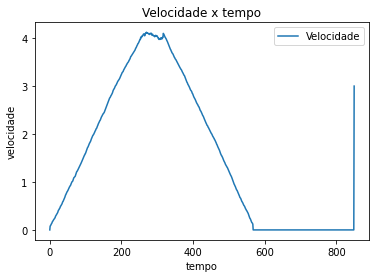

In [25]:
y1 = register_with_label[4]
plt.plot(y1, label = "Velocidade") 

plt.xlabel('tempo') 
plt.ylabel('velocidade') 
plt.title('Velocidade x tempo') 
plt.legend()